# Original neural network

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid= train_test_split(X_train_full, y_train_full) 

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

In [5]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9532 - val_loss: 0.5024
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5015 - val_loss: 0.4434
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4517 - val_loss: 0.4722
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4622 - val_loss: 0.4672
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.4111
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4213 - val_loss: 0.4032
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4127 - val_loss: 0.4000
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4188 - val_loss: 0.4046
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4032 - val_loss: 0.3914
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4177 - val_loss: 0.3911

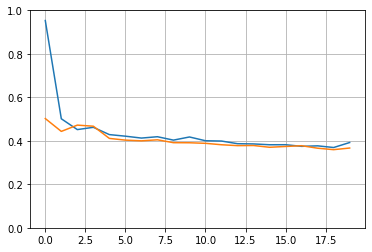

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
y_pred

array([[2.2593803],
       [2.905539 ],
       [1.4537716]], dtype=float32)

# Hyperparameter tuning

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [13]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [16]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0759 - val_loss: 0.5657
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5575 - val_loss: 0.5208
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5173 - val_loss: 0.4906
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4940 - val_loss: 0.4759
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4797 - val_loss: 0.4652
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4721 - val_loss: 0.4591
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4640 - val_loss: 0.4539
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4573 - val_loss: 0.4512
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4533 - val_loss: 0.4456
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4511 - val_lo

In [17]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 787us/step - loss: 0.3593


In [19]:
y_pred = keras_reg.predict(X_new)

In [20]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate" : reciprocal(3e-4, 3e-2) 
}

In [21]:
rnd_search_cv = RandomizedSearchCV(keras_reg, params_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5800 - val_loss: 0.5550
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5756 - val_loss: 0.5534
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5730 - val_loss: 0.5497
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5691 - val_loss: 0.5433
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5674 - val_loss: 0.5415
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5655 - val_loss: 0.5393
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5632 - val_loss: 0.5384
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5616 - val_loss: 0.5363
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5601 - val_loss: 0.5353
Epoch 25/100
242/242 [========================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f9d6c490a50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9d6bfdfad0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [22]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [23]:
rnd_search_cv.best_score_

-0.331489493449529

In [24]:
rnd_search_cv.best_estimator_

In [26]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 760us/step - loss: 0.3125


-0.31247201561927795

In [27]:
model = rnd_search_cv.best_estimator_.model 
model

In [28]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 774us/step - loss: 0.3125


0.31247201561927795